In [2]:
#_________________________________ IMPORTING LIBRARIES AND DATA _________________________________________#
%pylab inline
import os
import numpy as np
import pandas as pd
from scipy.misc import imread
from sklearn.metrics import accuracy_score
from scipy.misc import imresize
import tensorflow as tf
import keras

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Convolution2D, Flatten, MaxPooling2D, Reshape, InputLayer

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


Age:  MIDDLE


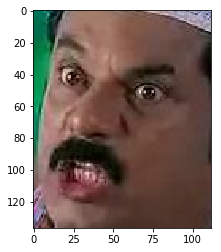

In [4]:
#_________________________________________________DATA IMPORTING _______________________________#

# To stop potential randomness
seed = 128
rng = np.random.RandomState(seed)

#importing data
root_dir = os.path.abspath('/media/soumyadip/Work/AnalyticsVidya/AgeDetection')
train = pd.read_csv(os.path.join(root_dir, 'train.csv'))
test = pd.read_csv(os.path.join(root_dir, 'test.txt'))
train.head()


#Checking one image data
i = random.choice(train.index)
img_name = train.ID[i]
img = imread(os.path.join(root_dir, 'Train', img_name))
print("Age: ", train.Class[i])
imshow(img)

In [7]:
#_________________________________________ DATA PREPROCESSING _____________________________________________#

#Storing image data as matrix form
temp = []
for img_name in train.ID:
    img_path = os.path.join(root_dir, 'Train', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    img = img.astype('float32') # this will help us in later stage
    temp.append(img)
    
train_x = np.stack(temp)

temp = []
for img_name in test.ID:
    img_path = os.path.join(root_dir, 'Test', img_name)
    img = imread(img_path)
    img = imresize(img, (32, 32))
    temp.append(img.astype('float32'))

test_x = np.stack(temp)

#Normalization of data
train_x /= 255.0
test_x /= 255.0

In [8]:
#_______________________________________ CONVERTING FEATURES _______________________________________________#

for i in train.index:
    if train.Class[i]=="YOUNG" :
        train.Class[i]=0  
    elif train.Class[i]=="MIDDLE" :
        train.Class[i]=1
    else:
        train.Class[i]=2
train_y = keras.utils.np_utils.to_categorical(train.Class.values)

In [10]:
#______________________________________ MODEL TRAINING ________________________________________________________#

# define computational graph metrices
input_reshape = (32,32, 3)

conv_num_filters = 5
conv_filter_size = 5
dropout_ratio = 0.3
pool_size = (2, 2)

hidden_num_units = 50
output_num_units = 3

epochs = 10
batch_size = 64

#Creating a computational graph
model = Sequential([
 InputLayer(input_shape=input_reshape),

 Convolution2D(25, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),
 Dropout(dropout_ratio),
 Convolution2D(125, 5, 5, activation='relu'),
 MaxPooling2D(pool_size=pool_size),
 Dropout(dropout_ratio),
 Convolution2D(1000, 4, 4, activation='relu'),

 Flatten(),

 Dense(output_dim=hidden_num_units, activation='relu'),
 Dropout(dropout_ratio),
 Dense(output_dim=output_num_units, input_dim=hidden_num_units, activation='softmax'),
])


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#model training starts
trained_model_conv = model.fit(train_x_temp, train_y, nb_epoch=epochs, batch_size=batch_size,shuffle=True,validation_split=0.2)

/home/soumyadip/.local/lib/python3.5/site-packages/ipykernel_launcher.py:19: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(25, (5, 5), activation="relu")`
/home/soumyadip/.local/lib/python3.5/site-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(125, (5, 5), activation="relu")`
/home/soumyadip/.local/lib/python3.5/site-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(1000, (4, 4), activation="relu")`
/home/soumyadip/.local/lib/python3.5/site-packages/ipykernel_launcher.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=50)`
/home/soumyadip/.local/lib/python3.5/site-packages/ipykernel_launcher.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="softmax", input_dim=50, units=3)`
/home/soumyadip/.local/lib/python3.5/site-packages/keras/models.py:844: UserWarning: The `nb_epoch` argument 

Train on 15924 samples, validate on 3982 samples
Epoch 1/10
15924/15924 [==============================] - 144s - loss: 0.9690 - acc: 0.5389 - val_loss: 0.9180 - val_acc: 0.5439
Epoch 2/10
15924/15924 [==============================] - 140s - loss: 0.9091 - acc: 0.5524 - val_loss: 0.8653 - val_acc: 0.5686
Epoch 3/10
15924/15924 [==============================] - 139s - loss: 0.8366 - acc: 0.6101 - val_loss: 0.7736 - val_acc: 0.6507
Epoch 4/10
15924/15924 [==============================] - 136s - loss: 0.7873 - acc: 0.6448 - val_loss: 0.7458 - val_acc: 0.6728
Epoch 5/10
15924/15924 [==============================] - 137s - loss: 0.7518 - acc: 0.6708 - val_loss: 0.6842 - val_acc: 0.6991
Epoch 6/10
15924/15924 [==============================] - 137s - loss: 0.7238 - acc: 0.6785 - val_loss: 0.6757 - val_acc: 0.7079
Epoch 7/10
15924/15924 [==============================] - 137s - loss: 0.6899 - acc: 0.6977 - val_loss: 0.6525 - val_acc: 0.7170
Epoch 8/10
15924/15924 [========================

In [12]:
#____________________________________________ PREDICTION __________________________________________________________#

#Prediction on test data
sample_submission = pd.read_csv(os.path.join(root_dir, 'Sample_Submission.csv'))
pred = model.predict_classes(test_x)

#Converting numerical to character vector
for i in range(len(pred)):
    if pred[i] == 0:
        temp[i] = "YOUNG"  
    elif pred[i] == 1:
        temp[i] = "MIDDLE"
    else:
        temp[i] = 'OLD'
        
#creating test file
sample_submission.ID = test.ID
sample_submission.Class = temp
sample_submission.to_csv(os.path.join(root_dir, 'Final_Submission.csv'), index=False)

6624/6636 [============================>.] - ETA: 0s